# Assignment 12 - ALY2100 CRN SEC 02 Fall 2023 CPS

---
Student: Margarita Kholostova

Instructor: Vladimir Shapiro

Date: November 26, 2023

---

<div style="page-break-after: always;"></div>

## Introduction

In the exploration of the Iris dataset, a classic in the field of machine learning and statistics, we delved into the fascinating world of botanical data analysis. This dataset, renowned for its simplicity yet informative nature, comprises measurements like sepal length, sepal width, petal length, and petal width of three Iris species. The objective was to apply statistical methods to understand and quantify the differences between these species. Through this process, we aimed not only to gain insights into the specific characteristics of Iris flowers but also to demonstrate the broader applicability of statistical techniques in real-world biological and ecological research. By analyzing this well-established dataset, we sought to bridge the gap between theoretical statistics and practical, real-world applications in botany and beyond (OpenAI, 2023)

## Analysis

### Task 1

Complete all the stats tests and graphs presented in this module. 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the data into a DataFrame
df = pd.read_csv('iris.data', header=None, names=column_names)

# Display the first few rows of the DataFrame
print(df.head())

print(df.shape)


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [2]:
# Basic statistical analysis
basic_stats = df.describe(include='all')
print(basic_stats)

        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


In [3]:
species_count = df['species'].value_counts()
print(species_count)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Figure 1
Pairplot for visualizing pairwise relationships


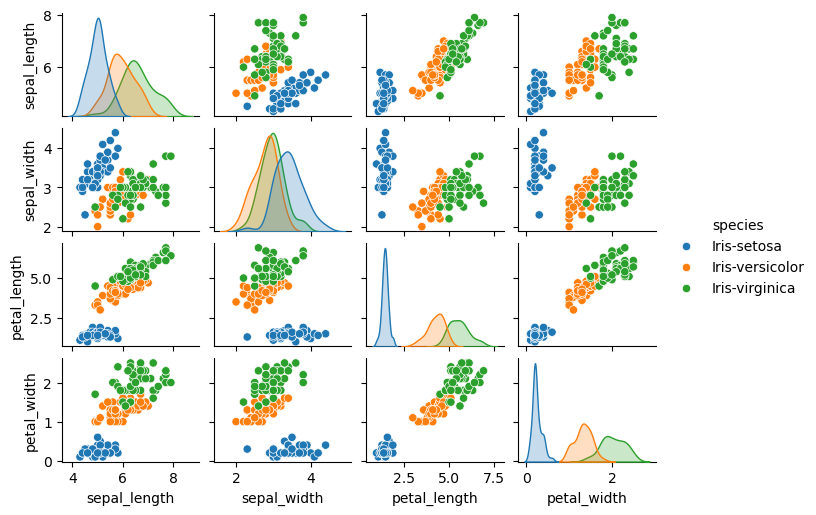

In [35]:
print('Figure 1')
print("Pairplot for visualizing pairwise relationships")

sns.pairplot(df, hue='species', height=1.3, aspect=1.3)
plt.show()

In [5]:
#checking for missing data
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing data in the dataset

In [6]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#save previous labels to future graphs
labels_not_encoded = df['species']

encoded_labels = label_encoder.fit_transform(df['species'])

df['species'] = encoded_labels

df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

Figure 2
Correlation Matrix


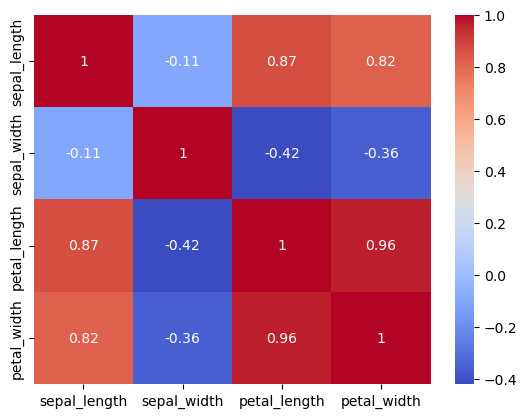

In [37]:
# Correlation matrix
correlation_matrix = df.drop('species', axis=1).corr()
print(correlation_matrix)

print('\nFigure 2')
print("Correlation Matrix")

#plotting heatmap for correlation
map = sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm' )

Petal Length & Petal Width have a great correlation (0.96), as well as Petal Length & Sepal Length (0.87), and also Petal Width & Sepal Length (0.82) are correlated.

    plt.subplot(221): It means the subplot is in the first cell of a 2x2 grid (top left).
    plt.subplot(222): The subplot is in the second cell of a 2x2 grid (top right).
    plt.subplot(223): This subplot is in the third cell of a 2x2 grid (bottom left).
    plt.subplot(224): The subplot is in the fourth cell of a 2x2 grid (bottom right).

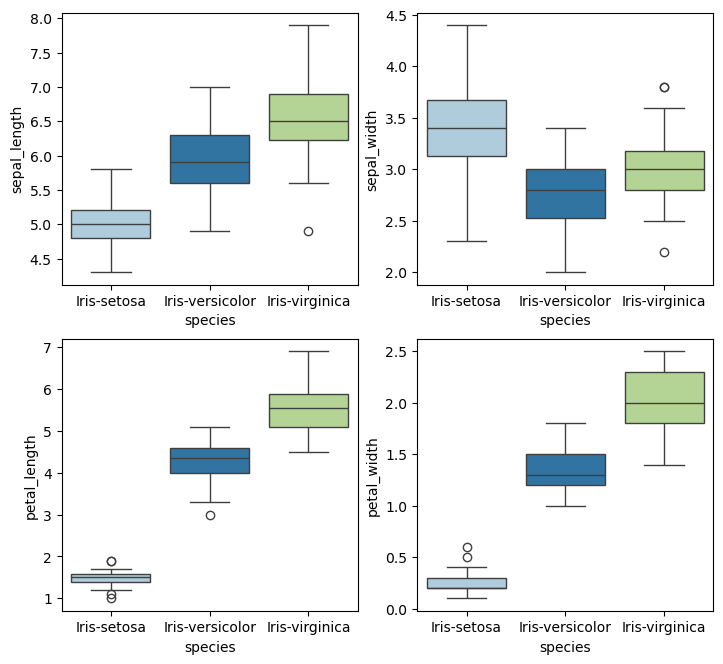

In [8]:
def graph(y):
    sns.boxplot(x=labels_not_encoded, y=y, data=df, hue = labels_not_encoded, palette='Paired' )
 
plt.figure(figsize=(13,12))
     
# Adding the subplot at the specified grid position
plt.subplot(331)
graph('sepal_length')
 
plt.subplot(332)
graph('sepal_width')
 
plt.subplot(334)
graph('petal_length')
 
plt.subplot(335)
graph('petal_width')
 
plt.show()

1. Setosa species has smalles features in sepal_length, petal_length & petal_width, but highest features in sepal width. iris-setosa also has some outliers in petal_length and petal_width feature.
2. Iris Versicolor species features are in the middle between two other species,except sepal width; some outliers present in petal_length.
3. Iris Virginica has highest features everywhere, except sepal_width; outliers present in sepal_width.


In [9]:
#looking for outliers with Interquartile Range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

#finding rows with outliers values
outlier_data = df[outliers.any(axis=1)]
outlier_data

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


Since there only 4 rows of outliers, deleting those rows is an easiest way to handle it.

In [10]:
# Removing outliers
outlier_rows = outliers.any(axis=1)

df_no_outliers = df[~outlier_rows]

df_no_outliers.shape

(146, 5)

### Task 2

Create a logistic regression model and check for performance.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

Create X and y Labeled Examples

In [12]:
feature_list = df_no_outliers.drop('species', axis=1).columns.tolist()

y= df_no_outliers['species']
X = df_no_outliers[feature_list]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features: " + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 146

Number of Features: 4
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Create Training and Test Data Sets

In [15]:
""" stratify ensures that both training and test datasets have the same
class proportions as the original dataset (eliminates the class bias*)"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234, stratify=y )

print(X_train.shape)
print(X_test.shape)

(97, 4)
(49, 4)


Fit a Logistic Regression Classification Model and Evaluate the Model

In [24]:
model = LogisticRegression(max_iter =1000)
model.fit(X_train, y_train)
probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: 0', 'Class: 1', 'Class: 2'])
# Round the values to 6 decimal places
df_print_rounded = df_print.round(6)

# Print the first 5 rows of the rounded DataFrame
print('Class Prediction Probabilities:\n' + df_print_rounded.head().to_string(index=False))


# compute the log loss on 'probability_predictions' 

l_loss = log_loss(y_test, probability_predictions)
print('\nLog loss: ' + str(l_loss))


# make predictions on the test data using the predict() method and assign the result to the variable 'class_label_predictions' 

class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions 
print('First 5 class predictions: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' 

acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))


Class Prediction Probabilities:
 Class: 0  Class: 1  Class: 2
 0.931839  0.068160  0.000001
 0.972649  0.027351  0.000000
 0.000019  0.076653  0.923329
 0.000054  0.071075  0.928871
 0.032528  0.944179  0.023293

Log loss: 0.1554006519782478
First 5 class predictions: [0 0 2 2 1]
Accuracy: 0.9387755102040817


In [25]:
def computeAccuracy(threshold_value):
    
    labels=[]
    for p in probability_predictions[:,0]:
        if p >= threshold_value:
            labels.append(False)
        else:
            labels.append(True)
    
    acc_score = accuracy_score(y_test, labels)
    return acc_score

thresholds = [0.44, 0.50, 0.55, 0.67, 0.75]
for t in thresholds:
    print("Threshold value {:.2f}: Accuracy {}".format(t, str(computeAccuracy(t))))

Threshold value 0.44: Accuracy 0.6530612244897959
Threshold value 0.50: Accuracy 0.6530612244897959
Threshold value 0.55: Accuracy 0.6530612244897959
Threshold value 0.67: Accuracy 0.6530612244897959
Threshold value 0.75: Accuracy 0.6530612244897959


Matrix: 
 [[16  0  0]
 [ 0 14  2]
 [ 0  1 16]]


Figure 3
Confusion Matrix


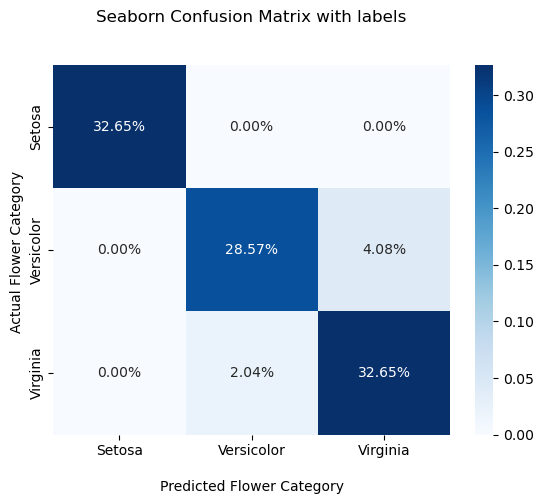

In [41]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, class_label_predictions)

print('Matrix: \n', cf_matrix)

print('\n\nFigure 3')
print("Confusion Matrix")

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

Diagonal parts (top-left cell, middle cell in the second row and bottom-right cell) represent percentafe of prediction that equals to true label. Off-diagonal elements are misclassified points.

## Task 3

Create and test a hypothesis (use t-test); explain your rationale and code.

Rationale: t-test is to compare two means of two independent groups, expecially when we need to determine if differences are statistically sagnificant or could have occured by chance. It's impoertant to have normally distrivuted data for this test to be appropriate.

Null Hypothesis (H0): The mean sepal length of Iris-setosa is equal to the mean sepal length of Iris-versicolor.

Alternative Hypothesis (H1): The mean sepal length of Iris-setosa is different from the mean sepal length of Iris-versicolor.

In [43]:
from scipy.stats import ttest_ind

# Filter data for Iris-setosa and Iris-versicolor
setosa = df[df['species'] == 'Iris-setosa']['sepal_length']
versicolor = df[df['species'] == 'Iris-versicolor']['sepal_length']

# Perform the t-test
t_stat, p_val = ttest_ind(setosa, versicolor)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


T-statistic: -10.52098626754911
P-value: 8.985235037487077e-18


In the analysis of the Iris dataset, an independent samples t-test was conducted to compare the mean sepal lengths of Iris-setosa and Iris-versicolor. The test yielded a T-statistic of -10.52, indicating a substantial difference between the two species' mean sepal lengths. Furthermore, the negative value of the T-statistic suggests that Iris-setosa typically has a smaller mean sepal length compared to Iris-versicolor. The P-value obtained from the test was 8.985e-18, which is significantly lower than the conventional alpha level of 0.05. This extremely low P-value provides strong evidence to reject the null hypothesis, affirming that the mean sepal length of Iris-setosa is statistically significantly different from that of Iris-versicolor. These findings are consistent with existing botanical knowledge, where Iris-setosa is recognized for having smaller sepal lengths in comparison to the other species in the Iris genus.

## Conclusion:

The statistical analysis of the Iris dataset provided significant insights into the morphological differences between Iris species, particularly between Iris-setosa and Iris-versicolor. The application of the t-test revealed statistically significant differences in sepal length between these species, reinforcing the validity of using quantitative methods to substantiate biological observations. This project underscores the importance of statistical analysis in the scientific field, offering a robust framework for testing hypotheses and validating empirical observations. Beyond its academic value, this study exemplifies how data-driven approaches can inform and enhance our understanding in various domains, including botany, ecology, and environmental conservation. The findings and methodologies employed here can be instrumental in guiding future research, supporting conservation efforts, and advancing our knowledge of plant species and their characteristics in the broader context of biodiversity and ecological studies (OpenAI, 2023).

### References:

1. Box plot in Seaborn. PYTHON CHARTS | The definitive Python data visualization site. (2022, October 4). https://python-charts.com/distribution/box-plot-seaborn/ 
2. Ecornell_ML_Foundations_Project. GitHub. (n.d.). https://github.com/kholostovamk/Ecornell_ML_Foundations_Project/blob/main/README.md 
3. GeeksforGeeks. (2020, November 12). How to use Seaborn color palette to color boxplot?. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-use-seaborn-color-palette-to-color-boxplot/ 
4. How to plot confusion matrix in python and why you need to?. Stack Vidhya. (2021, December 15). https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/ 
5. Introducing ChatGpt. Introducing ChatGPT. (n.d.). https://openai.com/blog/chatgpt/ 
6. Tables and figures. APA Tables and Figures - Purdue OWL® - Purdue University. (n.d.). https://owl.purdue.edu/owl/research_and_citation/apa_style/apa_formatting_and_style_guide/apa_tables_and_figures.html 